In [13]:
import torch
torch.cuda.empty_cache() 

In [14]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [15]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [16]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [17]:
import pandas as pd
from PIL import Image as ima

In [18]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

# Add function def show_anns (borrowed from one of the Jupyter notebooks).
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    # polygons = []
    # color = []
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)
    # for ann in sorted_anns:
    #     m = ann['segmentation']
    #     img = np.ones((m.shape[0], m.shape[1], 3))
    #     color_mask = np.random.random((1, 3)).tolist()[0]
    #     for i in range(3):
    #         img[:,:,i] = color_mask[i]
    #     ax.imshow(np.dstack((img, m*0.35)))

In [19]:
imageo = cv2.imread("/home/yelhe/data/fig/06.jpg")
imageo = cv2.cvtColor(imageo, cv2.COLOR_BGR2RGB)

In [20]:
b = np.load('/home/yelhe/script/mt/output/mask0.npy', allow_pickle=True)


In [21]:
mb = []
for i in range(0, len(b)):
    mb.append(b[i].astype('uint8'))

In [36]:
# Function to find and plot filtered contours (find-filter-plot-contour)
def ffpcontour(image, mask, i):
    image_masked = cv2.bitwise_and(image,image,mask = mask[i])
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 1:
        contour_f = contours
    else:
        contour_f = []
        for i in range(0, len(contours)):
            # print(i, "len", len(contours[i]))
            if len(contours[i]) > 80:
                contour_f.append(contours[i])
    # print("filtered", "len", len(contour_f), contour_f)
    # Plotting the filtered contour
    # -1 is the contourIdx, (0,255,0) is color, 3 is the thickness
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    img_con = cv2.drawContours(image_masked, contour_f, -1, (0,255,0), 3) 
    plt.figure(figsize = (15,15))
    plt.imshow(img_con)
    plt.axis('on')
    plt.show
    return contour_f

# Function to find and plot filtered contours (find-filter-plot-contour)
def ffpcontour_noplot(image, mask, i):
    assert image is not None, "image file could not be read, check with os.path.exists()"
    assert mask is not None, "mask file could not be read, check with os.path.exists()"
    # imgray = cv2.cvtColor(image_masked, cv2.COLOR_BGR2GRAY)
    # ret, thresh = cv2.threshold(imgray, 127, 255, 0)
    ret, thresh = cv2.threshold((mask[i]*255), 127, 255, 0)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 1:
        contour_f = contours
    else:
        contour_f = []
        for i in range(0, len(contours)):
            # print(i, "len", len(contours[i]))
            if len(contours[i]) > 80:
                contour_f.append(contours[i])
        # print("filtered", "len", len(contour_f), contour_f) 
    # print("raw",len(contours))
    # print("filtered", len(contour_f))
    return contour_f

In [59]:
# Contour geometric attributes result
# For each contour
def cgr(contour):
    assert contour is not None, "image file could not be read, check with os.path.exists()"
    c = contour
    isconvex = cv2.isContourConvex(c) # Checking convexity
    M = cv2.moments(c) # Monments
    area = cv2.contourArea(c) # Area 
    cx = int(M['m10']/M['m00']) # Centroid
    cy = int(M['m01']/M['m00'])
    xs,ys,ws,hs = cv2.boundingRect(c) # Straight bounding rectangle
    aspect_ratio_wh_s = float(ws)/hs # Aspect ratio
    extent_s = float(area)/(ws*hs) # Extent
    hull = cv2.convexHull(c) # Solidity
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    (x,y), (w,h), ar = cv2.minAreaRect(c) # Rotated rectangle with minimum area
    aspect_ratio_wh = float(w)/h  # Aspect ratio
    extent = float(area)/(w*h) # Extent
    (xe,ye),(MA,ma),ae = cv2.fitEllipse(c35[0])
    ed = np.sqrt(4*area/np.pi) # Equivalent Diameter
    ratio_ell = float(ma)/MA
    perimeter = cv2.arcLength(c, True) # Arclength
    p_centroid = np.array([float(cx), float(cy)])
    p_masscenter = np.array([float(x), float(y)])
    is_cen_inside = cv2.pointPolygonTest(c, p_centroid, False) # Checking if centroid is inside
    is_mce_inside = cv2.pointPolygonTest(c, p_masscenter, False) # Checking if mass center is inside    
    return {
        'isconvex': isconvex,
        'area': area,
        'aspect_ratio_wh_s': aspect_ratio_wh_s,
        'extent_s': extent_s,
        'solidity': solidity,
        'aspect_ratio_wh': aspect_ratio_wh,
        'extent': extent,
        'ed': ed,
        'ratio_ell': ratio_ell,
        'perimeter': perimeter,
        'is_cen_inside': is_cen_inside,
        'is_mce_inside': is_mce_inside
    }
          

In [60]:
def csga(contours):
    assert contours is not None, "image file could not be read, check with os.path.exists()"
    if len(contours) == 1:
        ga = cgr(contours[0])
    else:
        gal = []
        for i in range(0, (len(contours)-1)):
            gal.append(cgr(contours[i]))
        isc = []
        al = []
        asps = []
        exts = []
        sol = []
        asp = []
        ext = []
        ed = []
        rate = []
        per = []
        isc = []
        ism = []
        for i in range(0, len(gal)):
            isc.append(gal[0]['isconvex'])
            al.append(gal[0]['area'])
            asps.append(gal[0]['aspect_ratio_wh_s'])
            exts.append(gal[0]['extent_s'])
            sol.append(gal[0]['solidity'])
            asp.append(gal[0]['aspect_ratio_wh'])
            ext.append(gal[0]['extent'])
            ed.append(gal[0]['ed'])
            rate.append(gal[0]['ratio_ell'])
            per.append(gal[0]['perimeter'])
            isc.append(gal[0]['is_cen_inside'])
            ism.append(gal[0]['is_mce_inside'])
        isconvex = np.all(isc)
        area = np.mean(al)
        aspect_ratio_wh_s = np.mean(asps)
        extent_s = np.mean(exts)
        solidity = np.mean(sol)
        aspect_ratio_wh = np.mean(asp)
        extent = np.mean(ext)
        ed = np.mean(ed)
        ratio_ell = np.mean(rate)
        perimeter = np.mean(per)
        is_cen_inside = np.mean(isc)
        is_mce_inside = np.mean(ism)
        ga = {
            'isconvex': isconvex,
            'area': area,
            'aspect_ratio_wh_s': aspect_ratio_wh_s,
            'extent_s': extent_s,
            'solidity': solidity,
            'aspect_ratio_wh': aspect_ratio_wh,
            'extent': extent,
            'ed': ed,
            'ratio_ell': ratio_ell,
            'perimeter': perimeter,
            'is_cen_inside': is_cen_inside,
            'is_mce_inside': is_mce_inside
        }
    return ga


In [139]:
df1 = pd.read_csv('/home/yelhe/script/mt/output/result1_labeled.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               48 non-null     int64  
 1   gmedian            48 non-null     float64
 2   rmedian            48 non-null     float64
 3   bmedian            48 non-null     float64
 4   bmean              48 non-null     float64
 5   gmean              48 non-null     float64
 6   rmean              48 non-null     float64
 7   bstd               48 non-null     float64
 8   gstd               48 non-null     float64
 9   rstd               48 non-null     float64
 10  isconvex           48 non-null     bool   
 11  area               48 non-null     float64
 12  aspect_ratio_wh_s  48 non-null     float64
 13  extent_s           48 non-null     float64
 14  solidity           48 non-null     float64
 15  aspect_ratio_wh    48 non-null     float64
 16  extent             48 non-nu

In [140]:
df = df1

In [141]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [142]:
np.unique(df['labelgroup'])

array(['billboard', 'building', 'infrastructure', 'road', 'sky',
       'vegetation'], dtype=object)

In [143]:
print(df.shape[1])
print(df.shape[0])

25
48


In [144]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['labelgroup_index'] = le.fit_transform(df['labelgroup'])
y = df['labelgroup']
y = le.transform(y)

In [145]:
df_new = df.iloc[:, 1:22]

In [146]:
df_new['isconvex'] = df_new['isconvex'].astype(int)

In [147]:
df_new = df_new.astype(float)

In [148]:
df_new.head()

,gmedian,rmedian,bmedian,bmean,gmean,rmean,bstd,gstd,rstd,isconvex,...,aspect_ratio_wh_s,extent_s,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside
0,159.0,220.0,113.0,115.037443,161.245059,219.314712,29.171680,27.310695,19.057815,0.0,...,2.303650,0.784646,0.820970,2.320830,0.789984,1039.179935,3.237304,6627.573049,0.5,1.0
1,150.0,149.0,155.0,154.293353,147.912176,146.682473,18.354942,19.075097,20.102601,0.0,...,4.841004,0.448832,0.769425,0.205655,0.451825,397.523513,3.237304,2627.952443,1.0,-1.0
2,149.0,141.0,158.0,157.416081,147.710813,140.176188,11.144862,11.465430,11.599858,0.0,...,2.264574,0.549203,0.772575,0.438555,0.555195,280.620662,3.237304,1488.957492,1.0,1.0
3,196.0,178.0,206.0,189.341364,179.771029,163.463858,41.914930,41.903284,39.716842,0.0,...,3.262548,0.337358,0.741346,0.194310,0.492126,306.604727,3.237304,1975.810306,1.0,1.0
4,63.0,79.0,55.0,58.687735,66.942850,80.942669,20.713621,19.271871,17.466285,0.0,...,2.270833,0.775803,0.983404,0.437788,0.787582,143.778709,3.237304,590.166520,1.0,1.0


In [149]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmedian            48 non-null     float64
 1   rmedian            48 non-null     float64
 2   bmedian            48 non-null     float64
 3   bmean              48 non-null     float64
 4   gmean              48 non-null     float64
 5   rmean              48 non-null     float64
 6   bstd               48 non-null     float64
 7   gstd               48 non-null     float64
 8   rstd               48 non-null     float64
 9   isconvex           48 non-null     float64
 10  area               48 non-null     float64
 11  aspect_ratio_wh_s  48 non-null     float64
 12  extent_s           48 non-null     float64
 13  solidity           48 non-null     float64
 14  aspect_ratio_wh    48 non-null     float64
 15  extent             48 non-null     float64
 16  ed                 48 non-nu

In [150]:
df_new.describe()

,gmedian,rmedian,bmedian,bmean,gmean,rmean,bstd,gstd,rstd,isconvex,...,aspect_ratio_wh_s,extent_s,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000
mean,85.375000,88.729167,78.093750,84.610492,92.386422,96.407439,34.173247,34.563555,34.558759,0.0,...,2.064357,0.582933,0.838429,2.999413,0.675285,136.686054,3.237304e+00,806.415644,0.937500,0.916667
std,45.449352,47.122177,49.757033,43.452050,39.462906,42.616796,12.790927,13.122619,15.680906,0.0,...,1.979540,0.189352,0.143401,8.201565,0.140437,155.946587,8.975774e-16,1036.940276,0.302911,0.403882
min,30.000000,26.000000,22.000000,32.128978,42.338912,29.849747,11.144862,11.126874,10.130948,0.0,...,0.027939,0.077883,0.230295,0.022281,0.157516,30.077179,3.237304e+00,139.698484,-1.000000,-1.000000
25%,48.750000,51.250000,38.750000,53.761906,64.042341,64.446918,24.857223,24.552967,21.189782,0.0,...,0.691120,0.504114,0.771788,0.438363,0.625086,59.296263,3.237304e+00,256.208151,1.000000,1.000000
50%,73.500000,77.000000,64.500000,76.187442,86.452664,89.790878,33.532140,35.383562,35.727033,0.0,...,1.070759,0.658127,0.891250,0.887769,0.716582,86.853237,3.237304e+00,493.776692,1.000000,1.000000
75%,113.750000,124.250000,95.500000,98.518846,112.126748,122.464639,41.825392,41.848278,44.832394,0.0,...,2.855637,0.724051,0.940278,1.885846,0.761164,172.367632,3.237304e+00,972.122666,1.000000,1.000000
max,196.000000,220.000000,206.000000,199.251051,194.583306,219.314712,70.840078,65.373869,68.549603,0.0,...,8.062500,0.791793,0.983404,52.965217,0.861891,1039.179935,3.237304e+00,6627.573049,1.000000,1.000000


In [151]:
df_new_try = df_new.drop(['area', 'ed', 'perimeter'], axis=1)

In [152]:
df_new_try.head()

,gmedian,rmedian,bmedian,bmean,gmean,rmean,bstd,gstd,rstd,isconvex,aspect_ratio_wh_s,extent_s,solidity,aspect_ratio_wh,extent,ratio_ell,is_cen_inside,is_mce_inside
0,159.0,220.0,113.0,115.037443,161.245059,219.314712,29.171680,27.310695,19.057815,0.0,2.303650,0.784646,0.820970,2.320830,0.789984,3.237304,0.5,1.0
1,150.0,149.0,155.0,154.293353,147.912176,146.682473,18.354942,19.075097,20.102601,0.0,4.841004,0.448832,0.769425,0.205655,0.451825,3.237304,1.0,-1.0
2,149.0,141.0,158.0,157.416081,147.710813,140.176188,11.144862,11.465430,11.599858,0.0,2.264574,0.549203,0.772575,0.438555,0.555195,3.237304,1.0,1.0
3,196.0,178.0,206.0,189.341364,179.771029,163.463858,41.914930,41.903284,39.716842,0.0,3.262548,0.337358,0.741346,0.194310,0.492126,3.237304,1.0,1.0
4,63.0,79.0,55.0,58.687735,66.942850,80.942669,20.713621,19.271871,17.466285,0.0,2.270833,0.775803,0.983404,0.437788,0.787582,3.237304,1.0,1.0


In [153]:
df_new_try.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmedian            48 non-null     float64
 1   rmedian            48 non-null     float64
 2   bmedian            48 non-null     float64
 3   bmean              48 non-null     float64
 4   gmean              48 non-null     float64
 5   rmean              48 non-null     float64
 6   bstd               48 non-null     float64
 7   gstd               48 non-null     float64
 8   rstd               48 non-null     float64
 9   isconvex           48 non-null     float64
 10  aspect_ratio_wh_s  48 non-null     float64
 11  extent_s           48 non-null     float64
 12  solidity           48 non-null     float64
 13  aspect_ratio_wh    48 non-null     float64
 14  extent             48 non-null     float64
 15  ratio_ell          48 non-null     float64
 16  is_cen_inside      48 non-nu

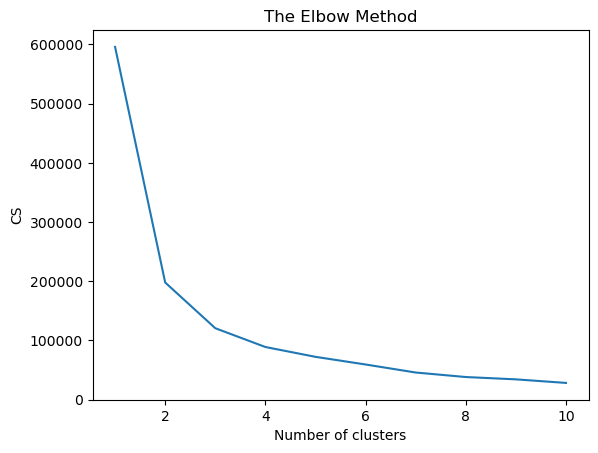

In [154]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new_try)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [155]:
kmeans = KMeans(n_clusters = 6,random_state=0, n_init="auto")
kmeans.fit(df_new_try)
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 5 out of 48 samples were correctly labeled.
Accuracy score: 0.10


In [156]:
# y
column_names = list(df_new_try.columns)
print(column_names)

['gmedian', 'rmedian', 'bmedian', 'bmean', 'gmean', 'rmean', 'bstd', 'gstd', 'rstd', 'isconvex', 'aspect_ratio_wh_s', 'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 'ratio_ell', 'is_cen_inside', 'is_mce_inside']


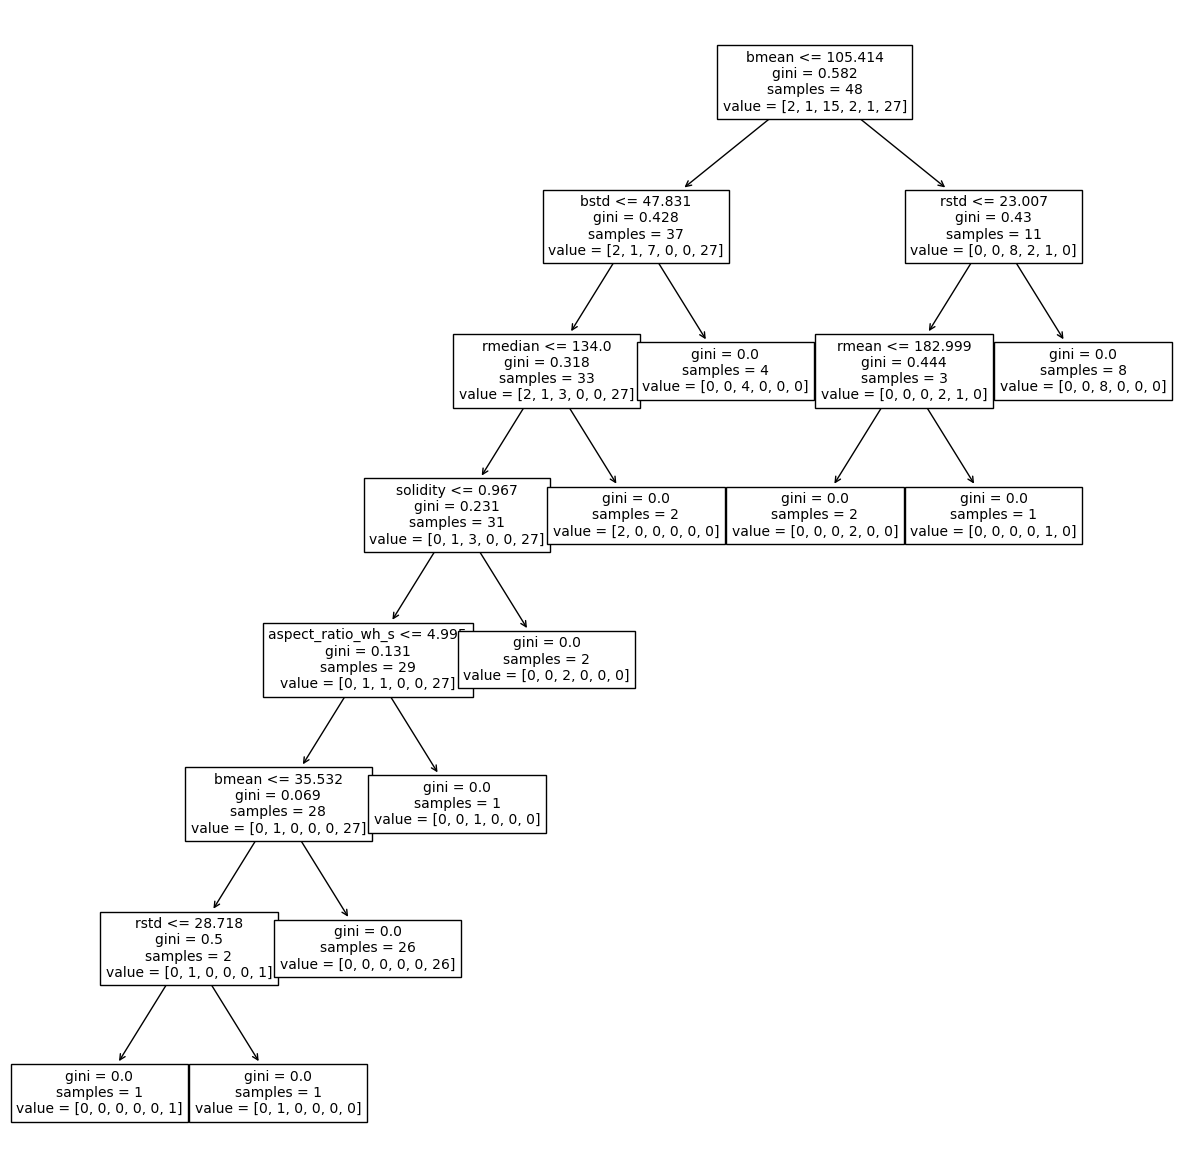

In [157]:

X = df_new_try
y = y

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

plt.figure(figsize=(15,15))
tree.plot_tree(dtree, feature_names = column_names, fontsize=10)
plt.show()